Dataset Image Distribution:

TRAIN: {'NORMAL': 1108, 'PNEUMONIA': 1108, 'UNKNOWN': 1108}
VAL: {'NORMAL': 237, 'PNEUMONIA': 237, 'UNKNOWN': 237}
TEST: {'NORMAL': 238, 'PNEUMONIA': 238, 'UNKNOWN': 238}
Total Image Counts: {'NORMAL': 1583, 'PNEUMONIA': 1583, 'UNKNOWN': 1583}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


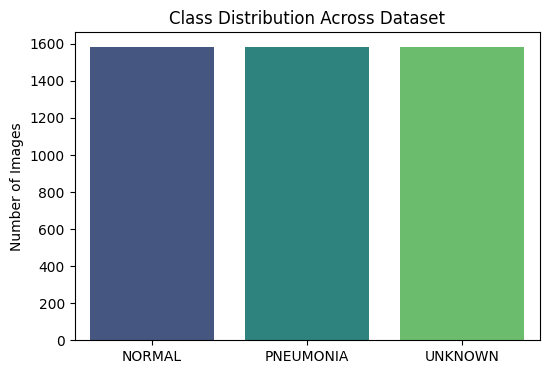

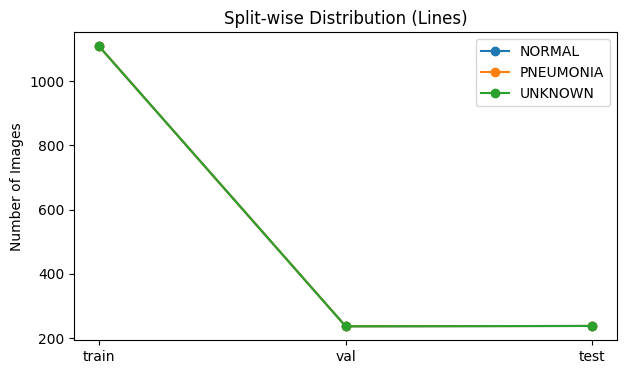

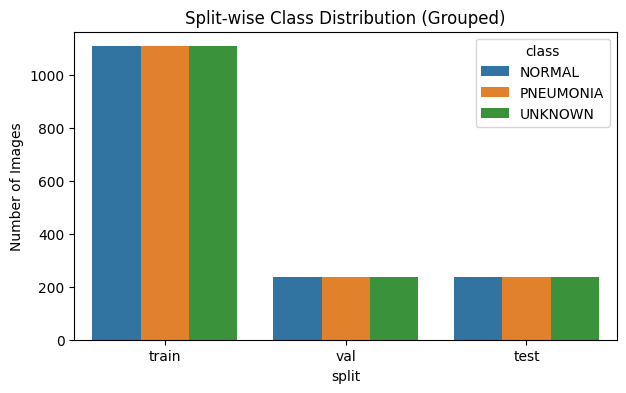

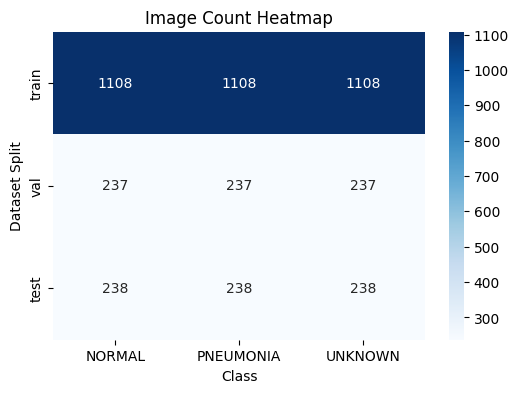

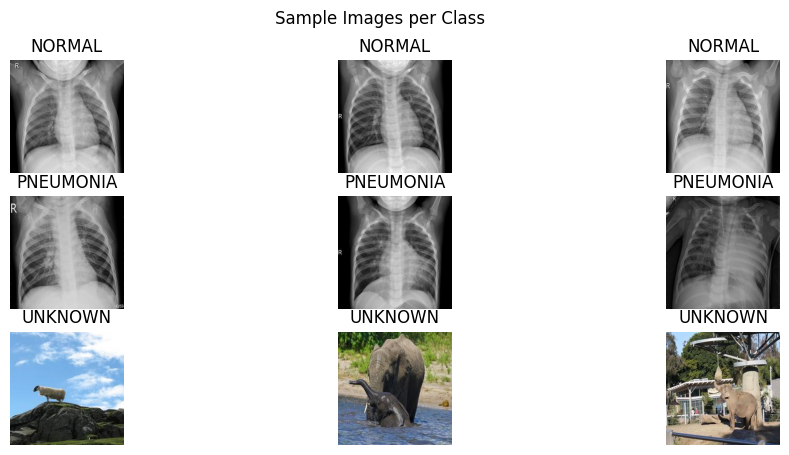

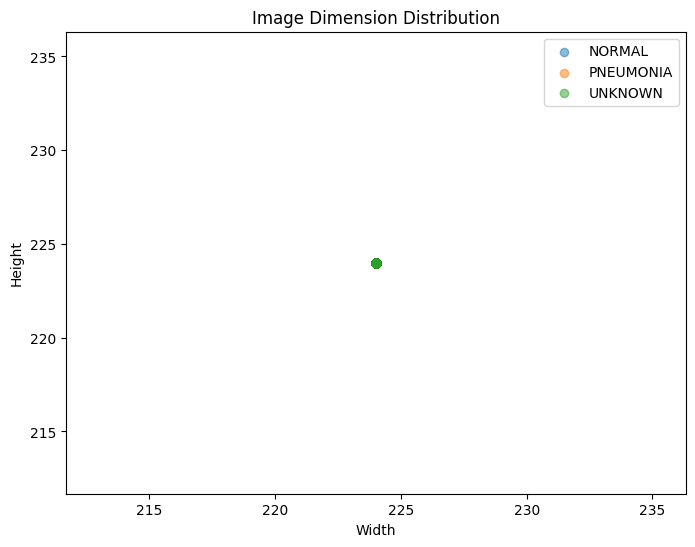

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


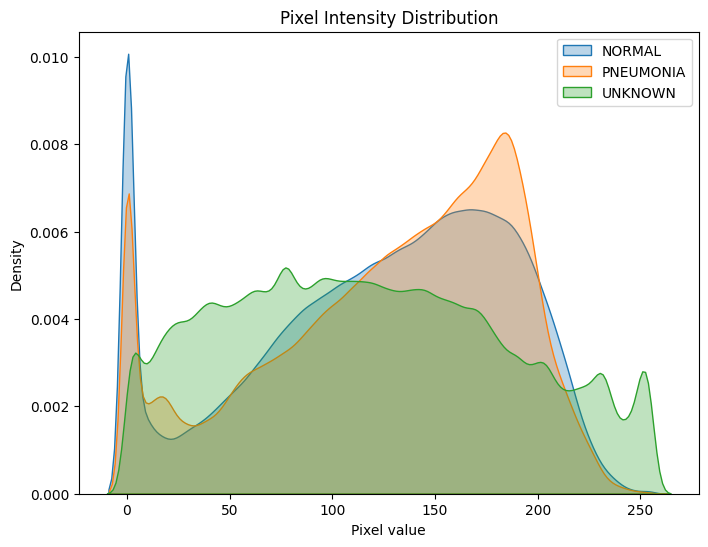

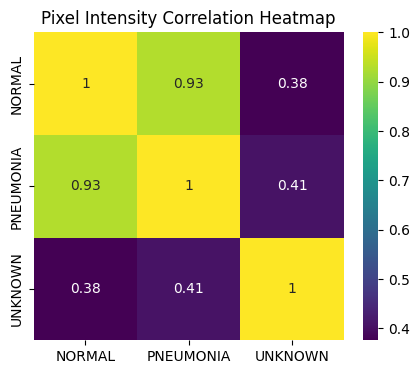

EDA Completed Successfully.


In [4]:
import os
import random
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

DATA_DIR = "/kaggle/input/pneumonia-balanced/Balanced"
SPLITS = ["train", "val", "test"]
CLASSES = ["NORMAL", "PNEUMONIA", "UNKNOWN"]

distribution = {split: {cls: 0 for cls in CLASSES} for split in SPLITS}
for split in SPLITS:
    for cls in CLASSES:
        folder = Path(DATA_DIR) / split / cls
        if folder.exists():
            distribution[split][cls] = len(os.listdir(folder))

print("Dataset Image Distribution:\n")
for split in SPLITS:
    print(f"{split.upper()}: {distribution[split]}")

total_counts = {cls: sum(distribution[split][cls] for split in SPLITS) for cls in CLASSES}
print("Total Image Counts:", total_counts)

plt.figure(figsize=(6,4))
sns.barplot(x=list(total_counts.keys()), y=list(total_counts.values()), palette="viridis")
plt.title("Class Distribution Across Dataset")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(7,4))
for cls in CLASSES:
    plt.plot(SPLITS, [distribution[s][cls] for s in SPLITS], marker="o", label=cls)
plt.title("Split-wise Distribution (Lines)")
plt.ylabel("Number of Images")
plt.legend()
plt.show()

rows = []
for split in SPLITS:
    for cls in CLASSES:
        rows.append({"split": split, "class": cls, "count": distribution[split][cls]})
df_split = pd.DataFrame(rows)

plt.figure(figsize=(7,4))
sns.barplot(data=df_split, x="split", y="count", hue="class")
plt.title("Split-wise Class Distribution (Grouped)")
plt.ylabel("Number of Images")
plt.show()

df_counts = pd.DataFrame(distribution).T
plt.figure(figsize=(6,4))
sns.heatmap(df_counts, annot=True, cmap="Blues", fmt="d")
plt.title("Image Count Heatmap")
plt.xlabel("Class")
plt.ylabel("Dataset Split")
plt.show()

def show_samples(n=3):
    plt.figure(figsize=(12, 5))
    for i, cls in enumerate(CLASSES):
        folder = Path(DATA_DIR) / "train" / cls
        samples = random.sample(os.listdir(folder), n)
        for j, fname in enumerate(samples):
            img = Image.open(folder / fname)
            plt.subplot(len(CLASSES), n, i*n + j + 1)
            plt.imshow(img, cmap="gray")
            plt.title(cls)
            plt.axis("off")
    plt.suptitle("Sample Images per Class")
    plt.show()

show_samples(3)

dims = {cls: [] for cls in CLASSES}
for cls in CLASSES:
    folder = Path(DATA_DIR) / "train" / cls
    files = os.listdir(folder)
    for fname in random.sample(files, min(200, len(files))):
        try:
            w, h = Image.open(folder / fname).size
            dims[cls].append((w, h))
        except:
            pass

plt.figure(figsize=(8,6))
for cls in CLASSES:
    if dims[cls]:
        w, h = zip(*dims[cls])
        plt.scatter(w, h, alpha=0.5, label=cls)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Image Dimension Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for cls in CLASSES:
    intensities = []
    folder = Path(DATA_DIR) / "train" / cls
    imgs = os.listdir(folder)
    for fname in random.sample(imgs, min(80, len(imgs))):
        img = Image.open(folder / fname).convert("L")
        intensities.extend(np.array(img).flatten())
    sns.kdeplot(intensities, label=cls, fill=True, alpha=0.3)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value")
plt.legend()
plt.show()

def load_random_pixel_vectors(class_name, num_samples=60):
    vectors = []
    folder = Path(DATA_DIR) / "train" / class_name
    files = os.listdir(folder)
    chosen = np.random.choice(files, min(num_samples, len(files)), replace=False)
    for fname in chosen:
        try:
            img = Image.open(folder / fname).convert("L").resize((64, 64))
            vectors.append(np.array(img).flatten())
        except:
            pass
    return np.array(vectors)

mean_vectors = [load_random_pixel_vectors(cls).mean(axis=0) for cls in CLASSES]
corr_matrix = np.corrcoef(mean_vectors)

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, xticklabels=CLASSES, yticklabels=CLASSES, cmap="viridis")
plt.title("Pixel Intensity Correlation Heatmap")
plt.show()

print("EDA Completed Successfully.")